In [4]:
import os
print(os.listdir("../BlackFridayAnalysisProject"))
from Libraries import *
from Functions import *

['.ipynb_checkpoints', 'Analyze.ipynb', 'Analyze.py', 'BlackFriday.csv', 'Functions.py', 'Libraries.py', '__init__.py', '__pycache__']


In [ ]:
df.info()

In [ ]:
df.head(20)

In [ ]:
## to check which columns have null values.
df.isna().any()

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
print("Всего совершенно покупок: ", df['User_ID'].count())
print(df.groupby(['Gender'])['User_ID'].count())

In [ ]:
quantity_of_customer = df['User_ID'].drop_duplicates()
print("Всего покупателей: ", quantity_of_customer.count())

In [ ]:
#Количество покупателей, мужчин и женщин
print(quantity_of_customer[df.Gender=='F'].count()) 
print(quantity_of_customer[df.Gender=='M'].count())

In [ ]:
#Среднее число покупок для мужчины и женщины 
print(df.groupby(['Gender'])['Product_ID'].count())
AverQuintityF = 132197/1666
AverQuintityM = 405380/4225
print("Среднее количество покупок для женщины:", AverQuintityF)
print("Среднее количество покупок для мужчины:", AverQuintityM)

In [ ]:
#Средняя сумма покупки для мужчины и для женщины
print(df.groupby(['Gender'])['Purchase'].mean())

5017668378
Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64


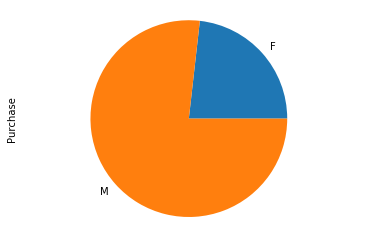

In [5]:
#Сумма покупок для женщины и мужчин
print(df['Purchase'].sum())
SumPur = df.groupby(['Gender'])['Purchase'].sum()
draw_pie_diagram(SumPur)

In [ ]:
#Женатые и нежинатые число покупателей
print(quantity_of_customer[df.Marital_Status==0].count())
print(quantity_of_customer[df.Marital_Status==1].count())

Marital_Status  Gender
0               F          76974
                M         240843
1               F          55223
                M         164537
Name: Purchase, dtype: int64


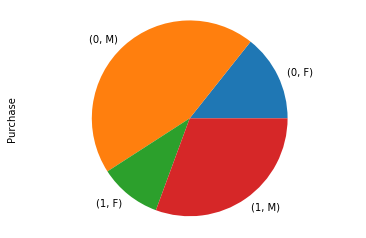

In [3]:
#Число покупок женатых и неженатых
poc1=df.groupby(['Marital_Status', 'Gender'])['Purchase'].count()
draw_pie_diagram(poc1)

Marital_Status  Gender
0               F          673815717
                M         2292473783
1               F          490808304
                M         1560570574
Name: Purchase, dtype: int64


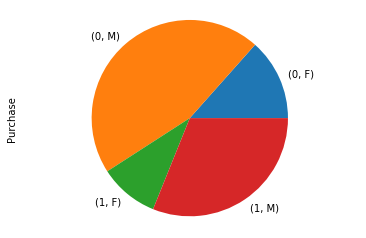

In [6]:
#Число покупок женатых и неженатых
poc=df.groupby(['Marital_Status', 'Gender'])['Purchase'].sum()
draw_pie_diagram(poc)

In [ ]:
#Число покупок женатых и неженатых
df.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()

In [ ]:
poc2=df.groupby(['Age'])['Purchase'].sum()
draw_pie_diagram(poc2)

In [ ]:
df.groupby(['Age'])['Purchase'].mean()

In [ ]:
vid = df.groupby(['Product_Category_1'])['User_ID'].count()
print(vid)
sns.countplot(df['Product_Category_1'])

In [ ]:
g=df.groupby(['Product_Category_1', 'Age'])['User_ID'].count()
print(g)
sns.countplot(df['Product_Category_1'], hue = df['Age'])

In [ ]:
sns.countplot(df['Age'], hue = df['Product_Category_1'])

In [ ]:
TratCity=df.groupby(['City_Category'])['Purchase'].sum()
print(TratCity)
TratCity.plot(kind='pie')
plt.axis('equal')
plt.show()

In [ ]:
TratOcu=df.groupby(['Occupation'])['Purchase'].count()
print(TratOcu)
TratOcu.plot(kind='pie')
plt.axis('equal')
plt.show()

In [ ]:
catpr=df.groupby(['Product_Category_1', 'Gender'])['User_ID'].sum()
print(catpr)
sns.countplot(df['Product_Category_1'], hue = df['Gender'])

In [ ]:
catci=df.groupby(['Product_Category_1', 'Stay_In_Current_City_Years'])['User_ID'].sum()
print(catci)
sns.countplot(df['Product_Category_1'], hue = df['Stay_In_Current_City_Years'])

In [ ]:
catco=df.groupby(['Stay_In_Current_City_Years'])['User_ID'].sum()
print(catco)
sns.countplot(df['Stay_In_Current_City_Years'])

In [ ]:
import numpy
numpy.corrcoef(df['Purchase'], df['Gender'])

In [ ]:
df.corr().iloc[:,-1]

In [ ]:
# correlation in consol scrren
#data.corr()

# correlation visualization square
#f,ax = plt.subplots(figsize=(10,5))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()

# correlation visualization triangle
corr = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
# Generate Color Map
colormap = sns.light_palette((210, 90, 60), input="husl")
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['Purchase'],bins=100, alpha=1)
plt.xlabel('Purchase',fontsize=40)
plt.ylabel('Count',fontsize=40)